Michael Loos

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import requests
import json
import sqlite3

In [2]:
#get first data set

#import csv as dataframe
df1=pd.read_csv('2007 season.csv')

#rename columns
df_renamed=df1.rename(columns={"id": "game_id", "home_line_scores[0]": "Home Q1","home_line_scores[1]": "Home Q2","home_line_scores[2]": "Home Q3",
                   "home_line_scores[3]": "Home Q4","away_line_scores[0]": "Away Q1", "away_line_scores[1]": "Away Q2",
                   "away_line_scores[2]": "Away Q3","away_line_scores[3]": "Away Q4"})

#drop unneccesary/blank/null columns
df_dropped=df_renamed.drop(columns=['season_type', 'start_time_tbd', 'home_post_win_prob', 'away_post_win_prob', 'excitement_index'])

#format data

#create new dataframe from df_dropped
df_formatted=df_dropped

#add date column from start_date
df_formatted['date']=df_dropped['start_date'].str[:10]

#add time column from start_date
df_formatted['time']=df_dropped['start_date'].str[11:16]
df_formatted.head()

#fill in blanks in conferences columns with FCS
df_formatted['home_conference'].fillna('FCS', inplace=True)
df_formatted['away_conference'].fillna('FCS', inplace=True)

df_game_data=df_formatted
df_game_data.head()

,game_id,season,week,start_date,neutral_site,conference_game,attendance,venue_id,venue,home_id,...,away_id,away_team,away_conference,away_points,Away Q1,Away Q2,Away Q3,Away Q4,date,time
0,272422433,2007,1,2007-08-30T19:00:00.000Z,False,False,22022,3817.0,Malone Stadium,2433,...,202,Tulsa,Conference USA,35,14,0,14,7.0,2007-08-30,19:00
1,272422050,2007,1,2007-08-30T19:00:00.000Z,False,True,7885,3919.0,Scheumann Stadium,2050,...,193,Miami (OH),Mid-American,14,0,7,0,7.0,2007-08-30,19:00
2,272420164,2007,1,2007-08-30T19:00:00.000Z,False,False,43091,3754.0,High Point Solutions Stadium,164,...,2084,Buffalo,Mid-American,3,0,0,3,0.0,2007-08-30,19:00
3,272422132,2007,1,2007-08-30T19:00:00.000Z,False,False,20223,3854.0,Nippert Stadium,2132,...,2546,Southeast Missouri State,FCS,3,0,3,0,0.0,2007-08-30,19:00
4,272420097,2007,1,2007-08-30T19:30:00.000Z,False,False,0,3873.0,Papa John's Cardinal Stadium,97,...,93,Murray State,FCS,10,7,3,0,0.0,2007-08-30,19:30


In [3]:
#get second data set

#url for website
url='https://www.sports-reference.com/cfb/schools/'

#create list of dataframes (only 1)
list_of_df = pd.read_html(url)

#assign first dataframe
df2=list_of_df[0]

#remove hierarchy and replace headers
df2.columns = ['Rank', 'School', 'From', 'To', 'Years', 'Overall Games','Overall Wins', 'Overall Losses', 'Overall Ties',
              'Overall Win Pct', 'Bowl Games', 'Bowl Wins', 'Bowl Losses', 'Bowl Ties', 'Bowl Win Pct', 'SRS', 
              'Strength of Schedule', 'AP Polls', 'Conference Championships', 'Notes']

#remove first row as it provides no value
df2.drop(columns=['Rank'], inplace=True)

#drop rows with header labels (occur every 20 entries)
drop_rows=[]

for i in range(326):
    if i==20:
        drop_rows.append(i)
    elif i==21:
        drop_rows.append(i)
    elif (i+2)%22==0:
        drop_rows.append(i)
        drop_rows.append(i+1)
    else:
        pass
        
df2.drop(drop_rows, inplace=True)    

#format columns to appropriate data types
df2['From']=df2['From'].astype(int)
df2['To']=df2['To'].astype(int)
df2['Years']=df2['Years'].astype(int)
df2['Overall Games']=df2['Overall Games'].astype(int)
df2['Overall Wins']=df2['Overall Wins'].astype(int)
df2['Overall Losses']=df2['Overall Losses'].astype(int)
df2['Overall Ties']=df2['Overall Ties'].astype(int)
df2['Overall Win Pct']=df2['Overall Win Pct'].astype(float)
df2['Bowl Games']=df2['Bowl Games'].astype(int)
df2['Bowl Wins']=df2['Bowl Wins'].astype(int)
df2['Bowl Losses']=df2['Bowl Losses'].astype(int)
df2['Bowl Ties']=df2['Bowl Ties'].astype(int)
df2['Bowl Win Pct']=df2['Bowl Win Pct'].astype(float)
df2['SRS']=df2['SRS'].astype(float)
df2['Strength of Schedule']=df2['Strength of Schedule'].astype(float)
df2['AP Polls']=df2['AP Polls'].astype(int)
df2['Conference Championships']=df2['Conference Championships'].astype(int)

#drop schools that did not play in 2007 and later as that is the relevant year for overall project
df2[df2['To']>=2007]

#replace NC State
df2.loc[df2['School']=='North Carolina State', ['School']] = 'NC State'

#replace TCU
df2.loc[df2['School']=='Texas Christian', ['School']] = 'TCU'

#replace Miami
df2.loc[df2['School']=='Miami (FL)', ['School']] = 'Miami'

df_program_data=df2
df_program_data.head()


,School,From,To,Years,Overall Games,Overall Wins,Overall Losses,Overall Ties,Overall Win Pct,Bowl Games,Bowl Wins,Bowl Losses,Bowl Ties,Bowl Win Pct,SRS,Strength of Schedule,AP Polls,Conference Championships,Notes
0,Air Force,1957,2020,64,737,396,329,12,0.545,27,13,13,1,0.500,1.22,-0.49,7,3,NaN
1,Akron,1975,2020,35,397,150,244,3,0.382,3,1,2,0,0.333,-11.91,-6.68,0,1,NaN
2,Alabama,1902,2020,117,1283,936,305,42,0.746,71,42,26,3,0.613,13.57,4.11,57,27,record adjusted to 907-314-41 by NCAA
3,Alameda Coast Guard,1943,1944,2,15,8,4,3,0.633,0,0,0,0,NaN,-0.16,-5.13,0,0,NaN
4,Alcorn State,1977,1977,1,11,3,8,0,0.273,0,0,0,0,NaN,-17.10,-9.19,0,0,NaN


In [4]:
#get third data set

#url for API data
url = 'https://api.collegefootballdata.com/games/media?year=2007'

#open url
r=requests.get(url)

#read contents
contents=(r.text)

#parse json string
info = json.loads(contents)

#convert json data to dataframe
df3 = pd.json_normalize(info)

#rename columns
df_renamed=df3.rename(columns={"id": "game_id", "startTime": "Date_time", "homeTeam":"home_team", "homeConference":"home_conference", 
                              "awayTeam":"away_team", "awayConference":"away_conference", "mediaType":"media_type"})

#drop unneccesary/blank/null columns
df_dropped=df_renamed.drop(columns=['seasonType', 'isStartTimeTBD'])

#format data

#create new dataframe from df_dropped
df_formatted=df_dropped

#add date column from start_date
df_formatted['date']=df_dropped['Date_time'].str[:10]

#add time column from start_date
df_formatted['time']=df_dropped['Date_time'].str[11:16]
df_formatted.head()

#fill in blanks in conferences columns with FCS
df_formatted['home_conference'].fillna('FCS', inplace=True)
df_formatted['away_conference'].fillna('FCS', inplace=True)

df_media_data=df_formatted
df_media_data.head()

,game_id,season,week,Date_time,home_team,home_conference,away_team,away_conference,media_type,outlet,date,time
0,272420344,2007,1,2007-08-30T20:00:00.000Z,Mississippi State,SEC,LSU,SEC,tv,ESPN,2007-08-30,20:00
1,272420097,2007,1,2007-08-30T19:30:00.000Z,Louisville,Big East,Murray State,FCS,tv,ESPNU,2007-08-30,19:30
2,272420068,2007,1,2007-08-30T21:05:00.000Z,Boise State,Western Athletic,Weber State,FCS,web,ESPN3,2007-08-30,21:05
3,272422132,2007,1,2007-08-30T19:00:00.000Z,Cincinnati,Big East,Southeast Missouri State,FCS,web,ESPN3,2007-08-30,19:00
4,272420166,2007,1,2007-08-30T20:00:00.000Z,New Mexico State,Western Athletic,Southeastern Louisiana,FCS,web,ESPN3,2007-08-30,20:00


In [6]:
#put dataframes into database
from sqlalchemy import create_engine

In [7]:
engine = create_engine('sqlite:///cfb.db', echo=True)
sqlite_connection = engine.connect()

2020-11-18 20:12:37,111 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-11-18 20:12:37,119 INFO sqlalchemy.engine.base.Engine ()
2020-11-18 20:12:37,119 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-11-18 20:12:37,119 INFO sqlalchemy.engine.base.Engine ()


In [8]:
#put game dataframe into database
sqlite_table = "Games"
df_game_data.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2020-11-18 20:12:38,804 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Games")
2020-11-18 20:12:38,804 INFO sqlalchemy.engine.base.Engine ()
2020-11-18 20:12:38,804 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("Games")
2020-11-18 20:12:38,804 INFO sqlalchemy.engine.base.Engine ()
2020-11-18 20:12:38,812 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE "Games" (
	"index" BIGINT, 
	game_id BIGINT, 
	season BIGINT, 
	week BIGINT, 
	start_date TEXT, 
	neutral_site BOOLEAN, 
	conference_game BOOLEAN, 
	attendance BIGINT, 
	venue_id FLOAT, 
	venue TEXT, 
	home_id BIGINT, 
	home_team TEXT, 
	home_conference TEXT, 
	home_points BIGINT, 
	"Home Q1" BIGINT, 
	"Home Q2" BIGINT, 
	"Home Q3" BIGINT, 
	"Home Q4" FLOAT, 
	away_id BIGINT, 
	away_team TEXT, 
	away_conference TEXT, 
	away_points BIGINT, 
	"Away Q1" BIGINT, 
	"Away Q2" BIGINT, 
	"Away Q3" BIGINT, 
	"Away Q4" FLOAT, 
	date TEXT, 
	time TEXT, 
	CHECK (neutral_site IN (0, 1)), 
	CHECK (conference_game IN (0, 1))
)



In [9]:
#put program dataframe into database
sqlite_table = "Programs"
df_program_data.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2020-11-18 20:12:40,530 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Programs")
2020-11-18 20:12:40,530 INFO sqlalchemy.engine.base.Engine ()
2020-11-18 20:12:40,538 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("Programs")
2020-11-18 20:12:40,539 INFO sqlalchemy.engine.base.Engine ()
2020-11-18 20:12:40,540 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE "Programs" (
	"index" BIGINT, 
	"School" TEXT, 
	"From" INTEGER, 
	"To" INTEGER, 
	"Years" INTEGER, 
	"Overall Games" INTEGER, 
	"Overall Wins" INTEGER, 
	"Overall Losses" INTEGER, 
	"Overall Ties" INTEGER, 
	"Overall Win Pct" FLOAT, 
	"Bowl Games" INTEGER, 
	"Bowl Wins" INTEGER, 
	"Bowl Losses" INTEGER, 
	"Bowl Ties" INTEGER, 
	"Bowl Win Pct" FLOAT, 
	"SRS" FLOAT, 
	"Strength of Schedule" FLOAT, 
	"AP Polls" INTEGER, 
	"Conference Championships" INTEGER, 
	"Notes" TEXT
)


2020-11-18 20:12:40,540 INFO sqlalchemy.engine.base.Engine ()
2020-11-18 20:12:40,548 INFO sqlalchemy.engine.base.Engine COMMIT
2020-11-

In [10]:
#put media dataframe into database
sqlite_table = "Media"
df_media_data.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2020-11-18 20:12:43,482 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Media")
2020-11-18 20:12:43,482 INFO sqlalchemy.engine.base.Engine ()
2020-11-18 20:12:43,487 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("Media")
2020-11-18 20:12:43,488 INFO sqlalchemy.engine.base.Engine ()
2020-11-18 20:12:43,489 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE "Media" (
	"index" BIGINT, 
	game_id BIGINT, 
	season BIGINT, 
	week BIGINT, 
	"Date_time" TEXT, 
	home_team TEXT, 
	home_conference TEXT, 
	away_team TEXT, 
	away_conference TEXT, 
	media_type TEXT, 
	outlet TEXT, 
	date TEXT, 
	time TEXT
)


2020-11-18 20:12:43,489 INFO sqlalchemy.engine.base.Engine ()
2020-11-18 20:12:43,497 INFO sqlalchemy.engine.base.Engine COMMIT
2020-11-18 20:12:43,497 INFO sqlalchemy.engine.base.Engine CREATE INDEX "ix_Media_index" ON "Media" ("index")
2020-11-18 20:12:43,497 INFO sqlalchemy.engine.base.Engine ()
2020-11-18 20:12:43,505 INFO sqlalchemy.engine.base.Engine COMMIT
2020-11-18 

In [11]:
#close connection
sqlite_connection.close()

In [37]:
#connect to database
conn = sqlite3.connect("cfb.db")

#set curser
cursor = conn.cursor()

#join tables and select necessary fields
cursor.execute('''SELECT Games.week,  
                        Games.neutral_site, 
                        Games.conference_game,
                        Games.attendance,
                        Games.home_team,
                        Games.home_conference,
                        Games.home_points,
                        Games.home_conference,
                        Games.away_team,
                        Games.away_conference,
                        Games.away_points,
                        Media.media_type,
                        Media.outlet,
                        Media.date,
                        Media.time,
                        Programs.School as H_School,
                        Programs.Years as H_years,
                        Programs.'Overall Games' as H_Overall_Games,
                        Programs.'Overall Wins'as H_Overall_Wins,
                        Programs.'Bowl Games' as H_Bowl_Games,
                        Programs.'Bowl Wins' as H_Bowl_Wins,
                        Programs.'AP Polls' as H_AP_Polls,
                        Programs.'Conference Championships' as H_Conf_Champ,
                        Prog_away.School as A_School,
                        Prog_away.Years as A_years,
                        Prog_away.'Overall Games' as A_Overall_Games,
                        Prog_away.'Overall Wins'as A_Overall_Wins,
                        Prog_away.'Bowl Games' as A_Bowl_Games,
                        Prog_away.'Bowl Wins' as A_Bowl_Wins,
                        Prog_away.'AP Polls' as A_AP_Polls,
                        Prog_away.'Conference Championships' as A_Conf_Champ
                        
                        FROM Games 
                        LEFT JOIN Media ON Games.game_id=Media.game_id 
                        LEFT JOIN Programs ON Programs.School=Games.home_team
                        LEFT JOIN Programs as Prog_away ON Prog_away.School=Games.away_team
                        ''')

#get column names from table
headers = [description[0] for description in cursor.description]
print(headers)

['week', 'neutral_site', 'conference_game', 'attendance', 'home_team', 'home_conference', 'home_points', 'home_conference', 'away_team', 'away_conference', 'away_points', 'media_type', 'outlet', 'date', 'time', 'H_School', 'H_years', 'H_Overall_Games', 'H_Overall_Wins', 'H_Bowl_Games', 'H_Bowl_Wins', 'H_AP_Polls', 'H_Conf_Champ', 'A_School', 'A_years', 'A_Overall_Games', 'A_Overall_Wins', 'A_Bowl_Games', 'A_Bowl_Wins', 'A_AP_Polls', 'A_Conf_Champ']


In [38]:
#convert to dataframe
df = pd.DataFrame(cursor.fetchall(), columns=headers) 
df.head(25)

,week,neutral_site,conference_game,attendance,home_team,home_conference,home_points,home_conference,away_team,away_conference,...,H_AP_Polls,H_Conf_Champ,A_School,A_years,A_Overall_Games,A_Overall_Wins,A_Bowl_Games,A_Bowl_Wins,A_AP_Polls,A_Conf_Champ
0,1,0,0,22022,Louisiana Monroe,Sun Belt,17,Sun Belt,Tulsa,Conference USA,...,NaN,NaN,Tulsa,89.0,970.0,493.0,21.0,10.0,8.0,27.0
1,1,0,1,7885,Ball State,Mid-American,13,Mid-American,Miami (OH),Mid-American,...,0.0,5.0,Miami (OH),59.0,662.0,359.0,10.0,5.0,4.0,10.0
2,1,0,0,43091,Rutgers,Big East,38,Big East,Buffalo,Mid-American,...,4.0,1.0,Buffalo,31.0,342.0,131.0,4.0,1.0,0.0,1.0
3,1,0,0,20223,Cincinnati,Big East,59,Big East,Southeast Missouri State,FCS,...,6.0,8.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,0,0,Louisville,Big East,73,Big East,Murray State,FCS,...,11.0,8.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0,0,12682,New Mexico State,Western Athletic,35,Western Athletic,Southeastern Louisiana,FCS,...,1.0,4.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,0,1,50112,Mississippi State,SEC,0,SEC,LSU,SEC,...,14.0,1.0,LSU,116.0,1238.0,784.0,52.0,28.0,42.0,12.0
7,1,0,0,47313,Iowa State,Big 12,14,Big 12,Kent State,Mid-American,...,2.0,2.0,Kent State,59.0,650.0,212.0,3.0,1.0,0.0,1.0
8,1,0,0,15102,Utah State,Western Athletic,16,Western Athletic,UNLV,Mountain West,...,3.0,12.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,0,0,30278,Boise State,Western Athletic,56,Western Athletic,Weber State,FCS,...,13.0,14.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
#convert 1s and 0s in columns to booleans
df['neutral_site']=[bool(x) for x in df['neutral_site']]
df['conference_game']=[bool(x) for x in df['conference_game']]

#create total_points column
df['total_points']=df['home_points']+df['away_points']

# fill NaN values with "Other"
df['media_type'] = df['media_type'].fillna('Other')
df['outlet'] = df['outlet'].fillna('Other')

In [73]:
df.head()

,week,neutral_site,conference_game,attendance,home_team,home_conference,home_points,home_conference,away_team,away_conference,...,H_Conf_Champ,A_School,A_years,A_Overall_Games,A_Overall_Wins,A_Bowl_Games,A_Bowl_Wins,A_AP_Polls,A_Conf_Champ,total_points
0,1,False,False,22022,Louisiana Monroe,Sun Belt,17,Sun Belt,Tulsa,Conference USA,...,NaN,Tulsa,89.0,970.0,493.0,21.0,10.0,8.0,27.0,52
1,1,False,True,7885,Ball State,Mid-American,13,Mid-American,Miami (OH),Mid-American,...,5.0,Miami (OH),59.0,662.0,359.0,10.0,5.0,4.0,10.0,27
2,1,False,False,43091,Rutgers,Big East,38,Big East,Buffalo,Mid-American,...,1.0,Buffalo,31.0,342.0,131.0,4.0,1.0,0.0,1.0,41
3,1,False,False,20223,Cincinnati,Big East,59,Big East,Southeast Missouri State,FCS,...,8.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
4,1,False,False,0,Louisville,Big East,73,Big East,Murray State,FCS,...,8.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83


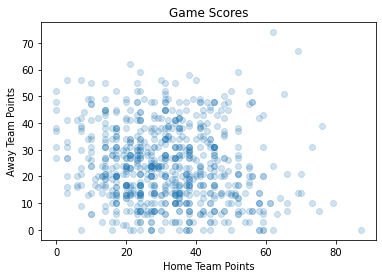

In [41]:
#Scatter plot of points for each team
plt.scatter(df.home_points,df.away_points, alpha=0.2)
plt.xlabel('Home Team Points')
plt.ylabel('Away Team Points')
plt.title('Game Scores')
plt.show()

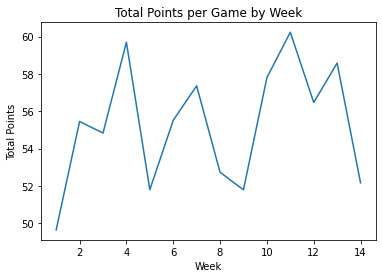

In [65]:
#Line graph of points by week
df.groupby(['week']).mean()['total_points'].plot()
plt.xlabel('Week')
plt.ylabel('Total Points')
plt.title('Total Points per Game by Week')
plt.show()

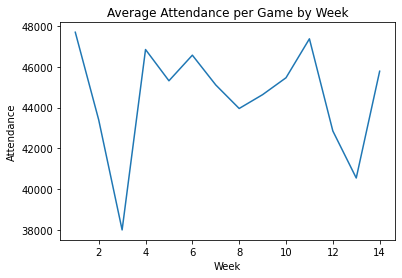

In [42]:
#Line graph of attendance by week
df.groupby(['week']).mean()['attendance'].plot()
plt.xlabel('Week')
plt.ylabel('Attendance')
plt.title('Average Attendance per Game by Week')
plt.show()

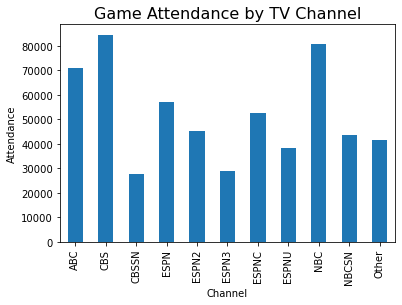

In [74]:
#bar chart of attendance by channel
df.groupby('outlet')['attendance'].mean().plot(kind='bar')
plt.title("Game Attendance by TV Channel",fontsize=16) 
plt.xlabel("Channel") 
plt.ylabel("Attendance") 
plt.show()

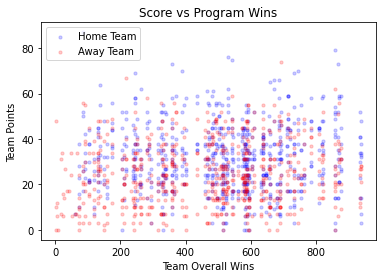

In [58]:
#Scatter plot of points vs program wins
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(df.H_Overall_Wins, df.home_points, s=10, c='b', label='Home Team', alpha=0.2)
ax1.scatter(df.A_Overall_Wins, df.away_points, s=10, c='r',label='Away Team', alpha=0.2)
plt.xlabel('Team Overall Wins')
plt.ylabel('Team Points')
plt.title('Score vs Program Wins')
plt.legend(loc='upper left');
plt.show()

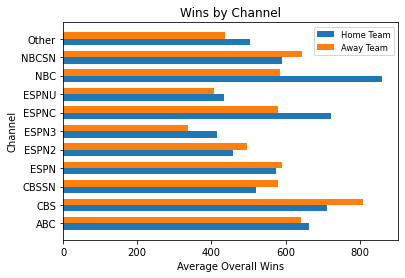

In [110]:
#bar chart showing average overall wins of teams on each channel


index = np.arange(11) #11 channels
bar_width = 0.35

#subplots for home and away
fig, ax = plt.subplots()
Home = ax.barh(index, df.groupby('outlet')['H_Overall_Wins'].mean(), bar_width,
                label="Home Team")

Away = ax.barh(index+bar_width, df.groupby('outlet')['A_Overall_Wins'].mean(),
                 bar_width, label="Away Team")

#labels
ax.set_xlabel('Average Overall Wins')
ax.set_ylabel('Channel')
ax.set_title('Wins by Channel')
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(["ABC", "CBS", "CBSSN", "ESPN", "ESPN2", "ESPN3", "ESPNC", "ESPNU", "NBC", "NBCSN", "Other"])

#set legent font size
fontP = FontProperties()
fontP.set_size('small')
ax.legend(loc='best', prop=fontP)



plt.show()

Summary:

I feel like I was able to learn about several new topics throughout this course. Not only was I able to learn a lot of new skills, I feel like I was really able to reinforce some of my previous knowledge or go even deeper into these topics and methods. To start, I am much more comfortable handling dataframes and all the different capabilities associated with them such as handling columns by renaming, dropping, or formatting data within them. I also feel like I was able to get a firm grasp of the “loc” and “iloc” methods, which is really useful when attempting to reformat certain entries. 

There were several new skills I had to learn to complete my project. I had previously learned how to import csv data into data frames and reading JSON data. However, reading HTML data with Beautiful Soup was new to me and necessary for the project. I also had to learn how to convert JSON data to a dataframe. Some newly learned methods to help analyze my data that proved very useful was grouping data by specific fields and calculating summary statistics such as counts, sums, and means. I was able to use these to view data and create graphs. Other new, useful calculations I used within my project was z-scores to determine outliers and Levenshtein distance to help format data by determining if the entries in my dataframes used the standard naming conventions for specific schools, so I would be able to connect data later. Finally, I had to learn about and use sql databased within Python. While I am familiar with SQL outside of Python, I had never used it with Python before. It was pretty easy to pickup and helped to easily join my dataframes and select the specific data I wanted. 

Overall, I learned a lot about handling data from sources that might not be perfect and how to fix and shape the data to meet my needs. Yet there are so many different types of data sources and way data can be formatted, I know I still have a long way to go. 